In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [6]:
x_train.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

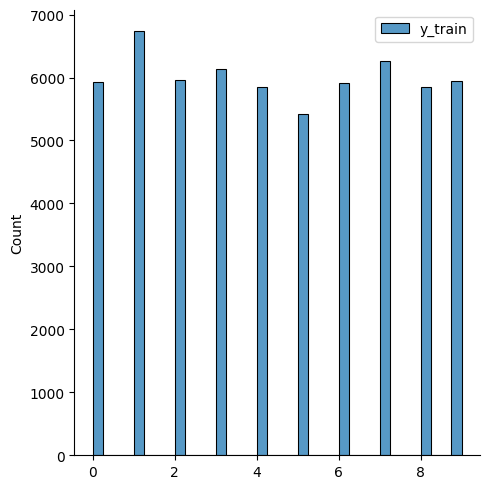

In [8]:
sns.displot(y_train, label='y_train')
plt.legend() 

In [10]:
unique_values, counts = np.unique(y_train, return_counts=True)
print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

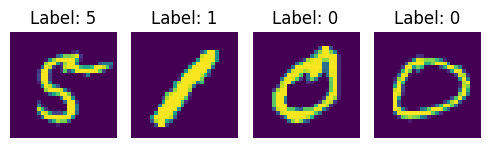

In [14]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

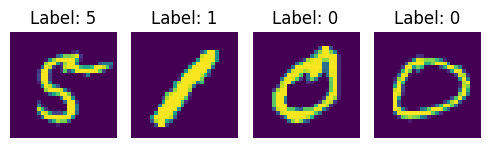

In [16]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [17]:
y_train_orig = y_train.copy()
y_test_orig = y_test.copy()
y_val_orig = y_val.copy()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

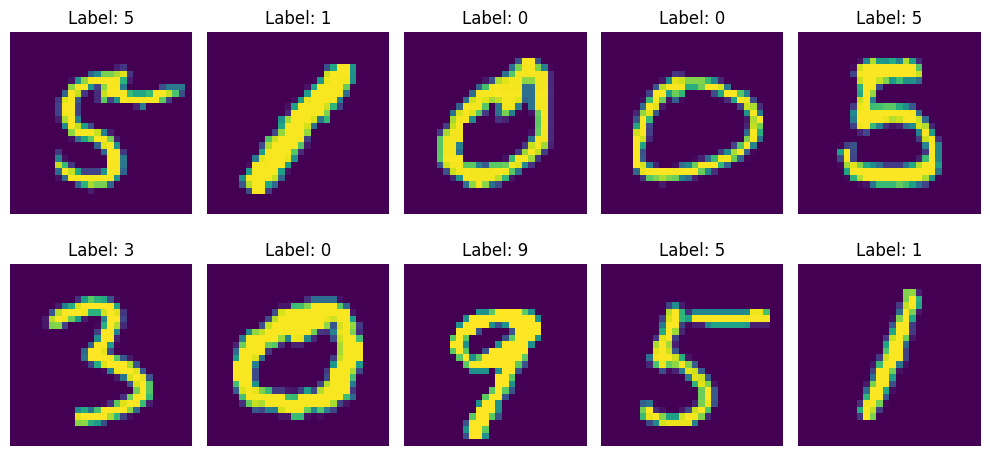

In [19]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5 , i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train_orig[i]}")  # Set the title for each image
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

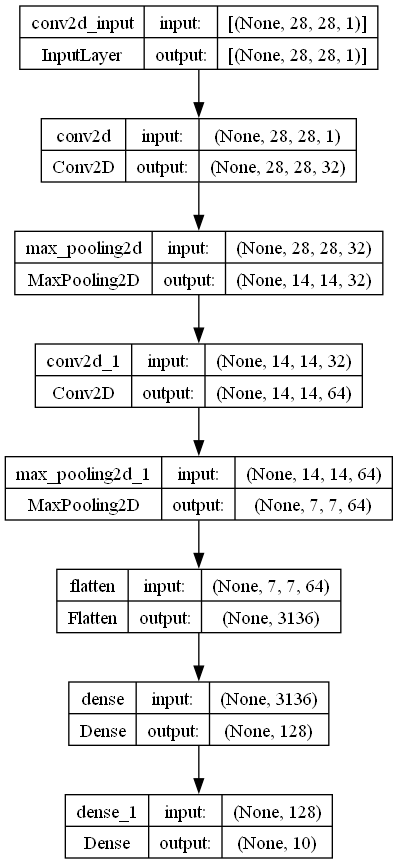

In [22]:
plot_model(model, show_shapes=True)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 10s 8ms/step - loss: 0.2198 - accuracy: 0.9360 - val_loss: 0.0836 - val_accuracy: 0.9743
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0486 - val_accuracy: 0.9861
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0437 - val_accuracy: 0.9864
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0434 - val_accuracy: 0.9868
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0410 - val_accuracy: 0.9876
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0372 - val_accuracy: 0.9896
Epoch

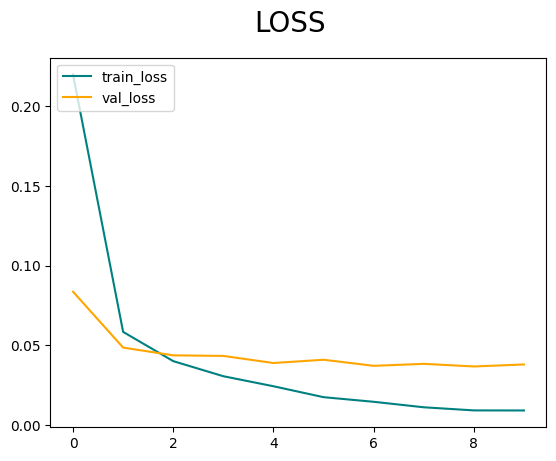

In [25]:
fig = plt.figure()
plt.plot(history.history["loss"], color='teal', label='train_loss')
plt.plot(history.history["val_loss"], color='orange', label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

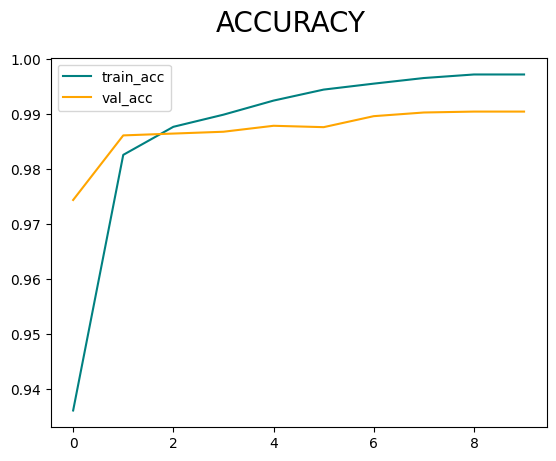

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='train_acc')
plt.plot(history.history['val_accuracy'],color='orange', label='val_acc')
plt.suptitle('ACCURACY',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9896
Test Accuracy: 98.96%
Test Loss: 0.033014994114637375


313/313 [==============================] - 1s 3ms/step


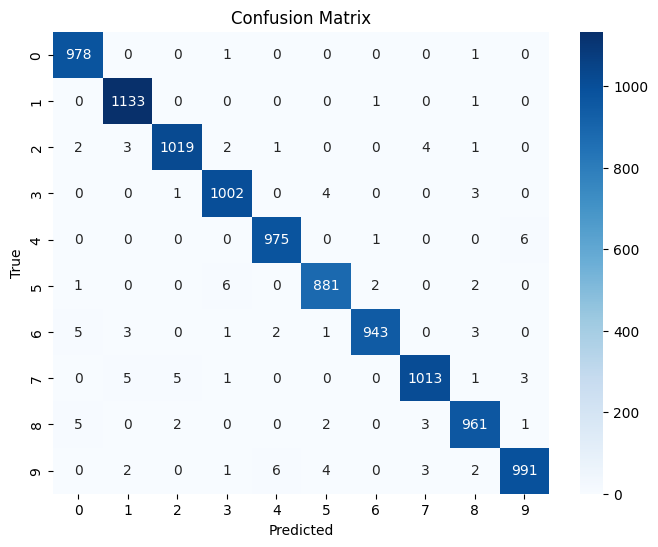

In [29]:
# Assuming you have predictions for x_test stored in y_pred
y_pred = model.predict(x_test)
categorical_y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), categorical_y_pred)

# Define class labels (if available)
class_labels = unique_values

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 267ms/step


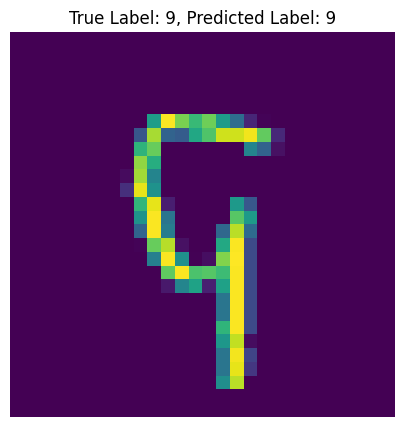

In [30]:
# Select a single image from the test set (e.g., the first image)
import random
image_index = random.randint(1, 499)  # Change this index to select a different image
selected_image = x_test[image_index]
true_label = y_test[image_index].argmax()


# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the selected image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(selected_image)
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()